# Assignment 01: Supervised learning, linear models, and loss functions [100 points]

In this assignment, you're going to hard code OLS and LAD cost functions to fit regression lines to a data set. For hint, refer to the lecture slides and follow the same structure for your coding, functions etc.

## Data set
`Assignment_1_data.csv` represents the marks, number of courses taken, and study time of 100 students.

## Caveat
Once you are done, please do the following steps:

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1 and 2 until your notebook runs errors free.

4.  Submit your completed notebook to OWL by the deadline.

5. Do not clear the answer outputs of your cells. When we open your notebooks for grading the outputs must be there, else marks will be deducted.

## Toolbox

In [1]:
# Import all the necessary packages:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as ss
import scipy.optimize as so
from IPython.display import display
%matplotlib inline
import sympy as sym

---
## Part 1
### Question 1.1 [14 points]


Read the `Assignment_1_data.csv` file as a `pandas.DataFrame`. Use appropriate pandas commands to show the descriptive statistics of the dataset as well as its first 10 rows.

In [2]:
# 6 points
# YOUR CODE HERE:
df = pd.read_csv("Assignment_1_data.csv")

#showing descriptive statistics of data set
df.describe()


,number_courses,Marks,time_study
count,100.000000,100.000000,100.000000
mean,5.290000,24.417690,22.434030
std,1.799523,14.326199,16.692231
min,3.000000,5.609000,0.384000
25%,4.000000,12.633000,9.567750
50%,5.000000,20.059500,18.763000
75%,7.000000,36.676250,31.468000
max,8.000000,55.299000,62.488000


In [3]:
#showinng first 10 rows 
df.head(n=10)

,number_courses,Marks,time_study
0,3,19.202,13.524
1,4,7.734,0.384
2,4,13.811,12.532
3,6,53.018,47.454
4,8,55.299,62.488
5,6,17.822,19.266
6,3,29.889,18.189
7,5,17.264,17.065
8,4,20.348,17.640
9,3,30.862,18.519


Add a new column to the dataframe and name it as "time_study_avg". Divide each student's "time_study" by his/her "number_courses" to calculate this new attribute. Then, drop the original "time_study" column as we do not need it anymore.

In [4]:
# 2 pts
# YOUR CODE HERE:
df["time_study_avg"] = df["time_study"]/df["number_courses"]
df_train_set = df.drop("time_study", axis='columns')
df_train_set.head()

,number_courses,Marks,time_study_avg
0,3,19.202,4.508
1,4,7.734,0.096
2,4,13.811,3.133
3,6,53.018,7.909
4,8,55.299,7.811


Compute the Pearson’s Correlation Coefficient between study time per course and marks. Then Investigate the relationship between the students' study time and marks by plotting a scatter plot of the `time_study_avg` (x axis) and `Marks` columns (y axis). Add an `alpha` (transparency of the plotted dots) in case some data are overlapping. Remember to label the axes.

In [5]:
# 4 points
# YOUR CODE HERE:
from scipy.stats import pearsonr
corr = pearsonr(df_train_set['time_study_avg'], df_train_set['Marks']).statistic
print("The pearson corr coefficient is: ", corr)

The pearson corr coefficient is:  0.942253890364054


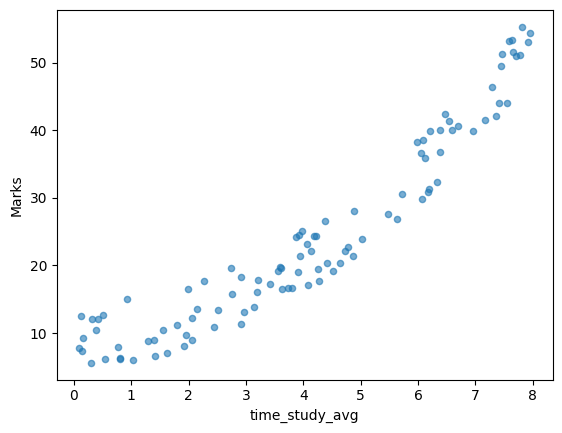

In [6]:
df_train_set.plot(kind="scatter", x ="time_study_avg",y ="Marks", alpha=0.6)
plt.show()

**Written question:** What do you see here? Discuss your findings. [2 points]

<font color='yellow'>**Written answer:**

I see a strong positive correlation between the two variables. The longer the student has studied, the higher their grades are to be.</font>

---
### Question 1.2 [4 point]

Recall that the linear model, we obtain predictions by computing

$ \hat{\mathbf{y}} = \mathbf{X} \hat{\beta} $

Here, $\mathbf{X}$ is a design matrix which includes a column of ones, $\hat{\beta}$ are coefficients, and $\hat{\mathbf{y}}$ are outcomes.  Write a function `linearModelPredict` to compute linear model predictions given data and a coefficient vector.  The function should take as it's arguments a 1d-array of coefficients `b` and the design matrix `X` as a 2d-array and return linear model predictions `yp`.

Test the function by setting

```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
```

Call your function using these values.

Report $\hat{\mathbf{y}}$.

What is the dimensionality of the numpy-array that you get back?

Hint:  Read the documentation for `np.dot` or the `@` operator in `numpy`.

In [7]:
# 4pt
# YOUR CODE HERE:

def linearModelPredict(b,X):
    # complete it...
    yp = X @ b
    return yp

# Test
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])

linearModelPredict(b,X)

array([ 0.1, -0.2,  0.7])

In [8]:
#the dimensionality result of the array is a 1d array 

In [9]:
# Note that b can either be a 2d array or a 1d array and the multiplication will still work
# This requires you to be cognizant about shapes and keep track of the dimension.
# Here are some examples

# b is a 2d array
print('Using a 2d array...')
X = np.eye(2)
b = 2*np.ones(2).reshape(-1,1)

print("X looks like:\n", X)
print("b looks like:\n", b)
#Note, the result of this multiplication is a 2d array
print("X@b is \n ", linearModelPredict(b,X))


# b is a 1d array
print('\n\nUsing a 1d array...')
X = np.eye(2)
b = 2*np.ones(2)

print("X looks like:\n", X)
print("b looks like:\n", b)
#Note, the result of this multiplication is a 1d array
print("X@b is \n ", linearModelPredict(b,X))

Using a 2d array...
X looks like:
 [[1. 0.]
 [0. 1.]]
b looks like:
 [[2.]
 [2.]]
X@b is 
  [[2.]
 [2.]]


Using a 1d array...
X looks like:
 [[1. 0.]
 [0. 1.]]
b looks like:
 [2. 2.]
X@b is 
  [2. 2.]


---
### Question 1.3 [10 points]

Write a function `linearModelLossRSS` which computes and returns the loss function for an OLS model parameterized by $\beta$, as well as the gradient of the loss.  The function should take as its first argument a 1d-array `beta` of coefficients for the linear model, as its second argument the design matrix `X` as a 2d-array, and as its third argument a 1d-array `y` of observed outcomes.

Test the function with these values:

```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2])
```

It must return:

`RSS of 2.06`

Gradient of `[-3.6 -4. ]`


In [10]:
# 8 pts
# YOUR CODE HERE:
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2])

def linearModelLossRSS ( b, X, y): 
    predY = linearModelPredict(b,X)
    res = y - predY
    rss = np.sum(np.square(res))
    gradient = -2*(X.T @ res)  
    return (rss, gradient)

linearModelLossRSS(b, X, y)

(2.06, array([-3.6, -4. ]))

**Written question:** To minimize the loss, do you need increase or decrease the value of the parameters? [2 points]


<font color='yellow'>**Written answer:**

Since the derivative of the loss function (gradient) is negative, we should increase the value of the parameters. Increasing the value of the parameters of the model would reduce the loss function</font>


---
### Question 1.4 [12 points]

Now that you've implemented a loss function in question 1.3, it is now time to minimize it.

Write a function `linearModelFit` to fit a linear model.  The function should take as its first argument the design matrix `X` as a 2d-array, as its second argument a 1d-array `y` of outcomes, and as its third argument a function  `lossfcn` which returns as a tuple the value of the loss, as well as the gradient of the loss. As a result, it should return the estimated betas and the R2.

Test the function with these values:
```
X = np.array([[1,0],[1,-1],[1,2]])
y = np.array([0,0.4,2])
```
It must return:

Betas: `[0.6 0.6]`

R2: `0.75`


**Hint**: Use `scipy.optimize.minimize` (refer to the slides) to minimize the loss function



In [11]:
# 12 pts
# YOUR CODE HERE:
import scipy.optimize as so

def linearModelFit(X, y, lossfcn): 
    bstart = [0,0]
    result = so.minimize(lossfcn, bstart, args=(X, y), jac=True)
    #optimization parameter estimates
    betas = result.x
    #optimized final loss function value
    rss = result.fun
    #R2 calculation 
    yBar = y - np.mean(y)
    tss = np.sum(np.square(yBar))
    r2 = 1 - (rss / tss)
    return  betas,  r2 



#Testing 
X = np.array([[1,0],[1,-1],[1,2]])
y = np.array([0,0.4,2])

linearModelFit(X, y, linearModelLossRSS)
 

    

(array([0.6, 0.6]), 0.75)

---
### Question 1.5 [14 points]

Use the above functions to fit your model to the given dataset. Then use your model and the fitted parameters to make predictions along a grid of equally spaced students' study time. You can get these by generating a new X-matrix with 100 equally space time_study_avgs (using for example [```np.linspace```](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)). Plot the data and add a line for the predicted values. Also report the $R^2$ value for the fit. You can do this by either printing out the $R^2$ of the fit or putting it on your plot via the built-in `annotate` function of `matplotlib`.


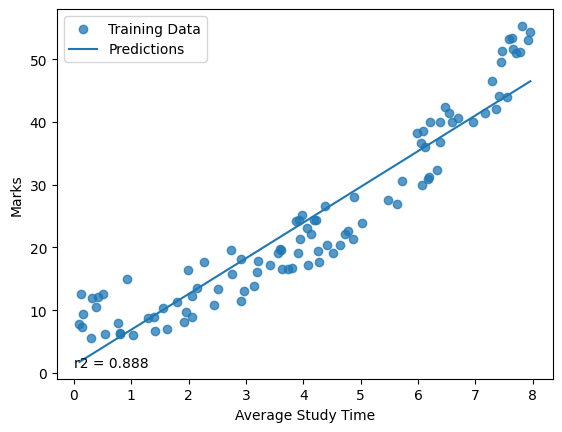

In [12]:
# 14 pts
# YOUR CODE HERE:
import scipy.optimize as so

def linearModelPredict(b,X):
    yp = X @ b
    return yp

def linearModelLossRSS ( b, X, y): 
    predY = linearModelPredict(b,X)
    res = y - predY
    rss = np.sum(np.square(res))
    gradient = -2*(X.T @ res)  
    return (rss, gradient)


def linearModelFit(X, y, lossfcn): 
    bstart = np.array([0,0])
    result = so.minimize(lossfcn, bstart, args=(X, y), jac=True)
    #optimization parameter estimates
    betas = result.x
    #optimized final loss function value
    rss = result.fun
    #R2 calculation 
    yBar = y - np.mean(y)
    tss = np.sum(np.square(yBar))
    r2 = 1 - (rss / tss)
    return  betas,  r2 

#training set data
time = df_train_set["time_study_avg"].values
#creating design matrix with 1s
X_train = np.column_stack((np.ones_like(time), time))


#predictions input data
time_grid = np.linspace(time.min(), time.max(), 100) 
#creating time design matrix
X_grid = np.column_stack((np.ones_like(time_grid), time_grid))

#output
y = df_train_set["Marks"].values

#training model 
betas, r2= linearModelFit(X_train, y, linearModelLossRSS)
#predicting values 
pred = linearModelPredict(betas, X_grid)

plt.scatter(df_train_set['time_study_avg'], df_train_set['Marks'], label = 'Training Data', alpha = 0.75)
plt.annotate("r2 = {:.3f}".format(r2), (0, 1))
plt.plot(time_grid, pred, label = 'Predictions')
plt.xlabel("Average Study Time")
plt.ylabel("Marks")
plt.legend()
plt.show()

---
## Part 2: LAD Regression

---
### Question 2.1 [10 points]

In the previous section, we worked with the OLS loss.  Now, we'll implement a linear model with the least absolute deviation (LAD) loss.

Write a function `linearModelLossLAD` which computes the least absolute deviation loss function for a linear model  parameterized by $\beta$, as well as the gradient of the loss.  The function should take as its first argument a 1d-array `beta` of coefficients for the linear model, as its second argument the design matrix `X` as a 2d-array, and as its third argument a 1d-array `y` of observed outcomes.

Test the function with the values:

```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2])
```
It must return:

LAD of `2.0`

Gradient of `[-1. -1.]`

In [13]:
# 10 points
# YOUR CODE HERE:

X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2])

def linearModelPredict(b,X):
    yp = X @ b
    return yp


def linearModelLossLAD(b, X, y): 
    predY = linearModelPredict(b,X)
    res = y - predY
    lad = np.sum(abs(res))
    gradient = -1*(np.sign(res) @ X) 
    return (lad, gradient)

linearModelLossLAD(b, X, y)


(2.0, array([-1., -1.]))

---
### Question 2.2: [10 points]


Use the above functions to fit your LAD model. Use your model to make predictions along a grid of 100 equally spaced students time_study_avg.  Once fit, add the fitted line to the scatter plot as in question 1.5.  Also report the $R^2$-value.

Note: If you recieve an error from the optimizer, it may be because the loss function for the LAD model is not differentiable at its minimum.  This will lead to some gradient based optimizers to fail to converge.  If this happens to you then pass `method="Powell"` to `scipy.optimize.minimize`.



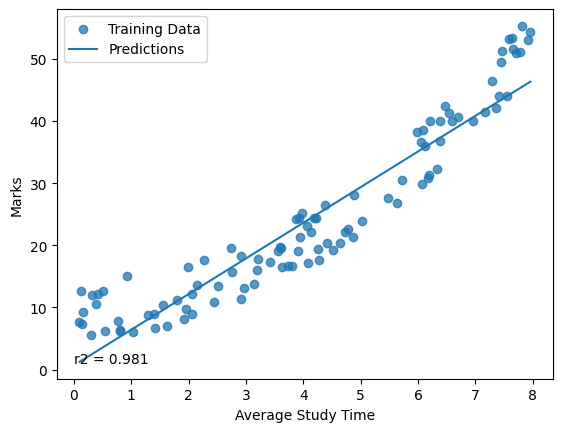

In [14]:
# 8 points
# YOUR CODE HERE:

def linearModelPredict(b,X):
    yp = X @ b
    return yp


def linearModelLossLAD(b, X, y): 
    predY = linearModelPredict(b,X)
    res = y - predY
    lad = np.sum(abs(res))
    gradient = -1*(np.sign(res) @ X) 
    return (lad, gradient)

def linearModelFit(X, y, lossfcn): 
    bstart = np.array([0,0])
    result = so.minimize(lossfcn, bstart, args=(X, y), jac=True)
    #optimization parameter estimates
    betas = result.x
    #optimized final loss function value
    rss = result.fun
    #R2 calculation 
    yBar = y - np.mean(y)
    tss = np.sum(np.square(yBar))
    r2 = 1 - (rss / tss)
    return  betas,  r2 

#training set data
time = df_train_set["time_study_avg"].values
#creating design matrix with 1s
X_train = np.column_stack((np.ones_like(time), time))


#predictions input data
time_grid = np.linspace(time.min(), time.max(), 100) 
#creating time design matrix
X_grid = np.column_stack((np.ones_like(time_grid), time_grid))

#output
y = df_train_set["Marks"].values

#training model 
betas, r2= linearModelFit(X_train, y, linearModelLossLAD)
#predicting values 
pred = linearModelPredict(betas, X_grid)

plt.scatter(df_train_set['time_study_avg'], df_train_set['Marks'], label = 'Training Data', alpha = 0.75)
plt.annotate("r2 = {:.3f}".format(r2), (0, 1))
plt.plot(time_grid, pred, label = 'Predictions')
plt.xlabel("Average Study Time")
plt.ylabel("Marks")
plt.legend()
plt.show()

**Written question**: What is the difference in the fit obtained with an L1 as compared to the L2 cost function? How their $R^2$ values compare? Why? [2 points]

<font color='yellow'> **Written Answer:**

The fit obtainaed with an L1 and L2 differ as L1 uses the absolute sum of residuals for error checking and L2 uses the sume of squares of residuals. The difference in R2 values tells us that the L1 cost function is a better fit for this data as its R2 value is greater. 98.1% of the variance of the dependent variable, Marks , is explained by the variance of the independent variable, Average study time per course</font>


---
### Question 2.3: [12 points]

Fit an OLS model to all student data with the `linear_model` module from the `sklearn` package by using the [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) class. The features (i.e., predictors) to use are average study time, and number of courses.

In [15]:
# 8 points
# YOUR CODE HERE:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

#creating mse object 
#err2 = metrics.mean_squared_error()

#creating linear regression object 
reg = linear_model.LinearRegression()


#training set data
time = df_train_set["time_study_avg"].values
#creating design matrix with 1s
X_train = np.column_stack((np.ones_like(time), time))

#predictions input data
time_grid = np.linspace(time.min(), time.max(), 100) 
#creating time design matrix
X_grid = np.column_stack((np.ones_like(time_grid), time_grid))

#target output 
y_true = df_train_set["Marks"].values


#training model using training set 
reg.fit(X_train, y_true)
#predicting values 
y_pred= reg.predict(X_grid)
#getting rss 
reg.score(X_train, y_true)

coef = reg.coef_
rss = reg.score(X_train, y_true)

print("The rss is: ", rss) 


The rss is:  0.8878423939061949


In no more than two sentences, comment on the $R^2$ values from your `sklearn` model and previous models. Are they similar? [4 pts]

<font color='yellow'> **Written Answer:**

The R2 values are similar. Using skikit the value is 0.8878 while the OLS model built previously gives a value of 0.888 which is rounded up. Scikit gives a more accurate number</font>

---
## Part 3: Custom loss function

---
### Question 3.1: [4 points]

Assume that the following function has been proposed to you to use as a new loss function for regression:

$$L_3(\hat{\beta}) = \sum_{i=1}^{n} ({y_i-\hat{y_i}})^3$$

What do you think about this new loss function, would you accept it? Please, explain.


<font color='yellow'>**Written answer:**

This is an acceptable loss function since it takes two parameters; the predicted Y value and the real Y value. This loss function would be more susceptible to outliers. I would not use this as the loss function for this dataset as large errors can occur due to the residual being cubed. Althoug this dataset does not contain many outliers the LAD and OLS loss functions propose a better parameter estimates 
</font>


---
### Question 3.2: [10 points]

Regardless of your answer to Question 4.1, taking $\: \hat{\mathbf{y}} = \mathbf{X.^2} \hat{\beta}\:$ as your functional form for regression (note that $\mathbf{X.^2}$ implies element-wise power), use your knowledge of calculus to calculate the gradient of $\: L_3(\hat{\beta}).$ Type your answer (including the intermediate steps) in the cell below in Latex format. Note that $\hat{\beta}=[\beta_0, \beta_1]^T$, and $\mathbf{X}$ is an $n$-by-$2$ matrix.




<font color='yellow'>**Written answer:**

$\:L_3(\hat{\beta}) = \sum_{i=1}^{n} ({y_i-\hat{y_i}})^3$

$\:\hat{\mathbf{y_i}} = \mathbf{X.^2} \hat{\beta}$

$\:L_3(\hat{\beta}) = \sum_{i=1}^{n} 3({y_i-\hat{y_i}})^2 \cdot \hat{y_i}$

$\:L_3(\hat{\beta}) = \sum_{i=1}^{n} 3({y_i-\mathbf{X.^2} \hat{\beta}})^2 \mathbf{X.^2}\hat{\beta}$

$\:L_3(\hat{\beta}) = \sum_{i=1}^{n} 3({y_i-\mathbf{X.^2} \hat{\beta}})^2 \mathbf{X.^2}\hat{\beta}$

$\:\frac{\partial L_3(\hat{\beta})}{\partial \beta_0} = -6 \sum_{i=1}^{n} (y_i-\mathbf{X_i}^2 \hat{\beta}) \cdot (\mathbf{X}_{i0})^2$

$\:\frac{\partial L_3(\hat{\beta})}{\partial \beta_1} = -6 \sum_{i=1}^{n} (y_i-\mathbf{X_i}^2 \hat{\beta}) \cdot (\mathbf{X}_{1})^2$

$\: L_3(\hat{\beta}) = \sum_{i=1}^{n} 3(y_i - \mathbf{X}_i^2 \hat{\beta})^2 \cdot \mathbf{X}_i^2$
</font>
